In [1]:
!ls


bom.movie_gross.csv
CONTRIBUTING.md
dsc-phase-2-project-v3
im.db
index.ipynb
LICENSE.md
maureen-objective2.ipynb
maureen-objective2-Copy1.ipynb
movie_data_erd.jpeg
README.md
student.ipynb
tmdb.movies.csv
tn.movie_budgets.csv
zippedData


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

<B>WE WILL MERGE THE DATASET AND THEN CLEAN IT ALTOGETHER THIS IS EASIER TO DO IT AT ONCE</B>

In [3]:
df=pd.read_csv("tn.movie_budgets.csv")
df


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [4]:
df2=pd.read_csv("tmdb.movies.csv")
df2

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


 I MERGED BEFORE CLEANING TO MAKE IT EASIER FOR ME TO CLEAN

In [5]:
df3 = pd.merge(df, df2, on="id")
df3

,id,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,Unnamed: 0,genre_ids,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count
0,27,"May 4, 2012",The Avengers,"$225,000,000","$623,279,547","$1,517,935,897",117,"[18, 10402, 10749]",en,9 Songs,10.332,2004-09-09,9 Songs,4.9,170
1,27,"May 21, 2010",Shrek Forever After,"$165,000,000","$238,736,787","$756,244,673",117,"[18, 10402, 10749]",en,9 Songs,10.332,2004-09-09,9 Songs,4.9,170
2,27,"Dec 25, 2015",The Revenant,"$135,000,000","$183,637,894","$532,938,302",117,"[18, 10402, 10749]",en,9 Songs,10.332,2004-09-09,9 Songs,4.9,170
3,27,"Dec 17, 2004",The Aviator,"$110,000,000","$102,608,827","$208,370,892",117,"[18, 10402, 10749]",en,9 Songs,10.332,2004-09-09,9 Songs,4.9,170
4,27,"Dec 18, 2002",The Lord of the Rings: The Two Towers,"$94,000,000","$342,548,984","$934,699,645",117,"[18, 10402, 10749]",en,9 Songs,10.332,2004-09-09,9 Songs,4.9,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,97,"May 15, 2015",Childless,"$1,000,000","$1,036","$1,036",2567,"[878, 28, 12]",en,Tron,12.063,1982-07-09,Tron,6.6,1100
340,97,"Apr 7, 1933",King Kong,"$672,000","$10,000,000","$10,000,650",2567,"[878, 28, 12]",en,Tron,12.063,1982-07-09,Tron,6.6,1100
341,97,"Aug 11, 2006",Conversations with Other Women,"$450,000","$379,418","$1,297,745",2567,"[878, 28, 12]",en,Tron,12.063,1982-07-09,Tron,6.6,1100
342,97,"Apr 11, 2014",Jesus People,"$250,000",$0,$0,2567,"[878, 28, 12]",en,Tron,12.063,1982-07-09,Tron,6.6,1100


In [6]:
df=df3
df

,id,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,Unnamed: 0,genre_ids,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count
0,27,"May 4, 2012",The Avengers,"$225,000,000","$623,279,547","$1,517,935,897",117,"[18, 10402, 10749]",en,9 Songs,10.332,2004-09-09,9 Songs,4.9,170
1,27,"May 21, 2010",Shrek Forever After,"$165,000,000","$238,736,787","$756,244,673",117,"[18, 10402, 10749]",en,9 Songs,10.332,2004-09-09,9 Songs,4.9,170
2,27,"Dec 25, 2015",The Revenant,"$135,000,000","$183,637,894","$532,938,302",117,"[18, 10402, 10749]",en,9 Songs,10.332,2004-09-09,9 Songs,4.9,170
3,27,"Dec 17, 2004",The Aviator,"$110,000,000","$102,608,827","$208,370,892",117,"[18, 10402, 10749]",en,9 Songs,10.332,2004-09-09,9 Songs,4.9,170
4,27,"Dec 18, 2002",The Lord of the Rings: The Two Towers,"$94,000,000","$342,548,984","$934,699,645",117,"[18, 10402, 10749]",en,9 Songs,10.332,2004-09-09,9 Songs,4.9,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,97,"May 15, 2015",Childless,"$1,000,000","$1,036","$1,036",2567,"[878, 28, 12]",en,Tron,12.063,1982-07-09,Tron,6.6,1100
340,97,"Apr 7, 1933",King Kong,"$672,000","$10,000,000","$10,000,650",2567,"[878, 28, 12]",en,Tron,12.063,1982-07-09,Tron,6.6,1100
341,97,"Aug 11, 2006",Conversations with Other Women,"$450,000","$379,418","$1,297,745",2567,"[878, 28, 12]",en,Tron,12.063,1982-07-09,Tron,6.6,1100
342,97,"Apr 11, 2014",Jesus People,"$250,000",$0,$0,2567,"[878, 28, 12]",en,Tron,12.063,1982-07-09,Tron,6.6,1100


WE WILL FIRST CHECK IF THERE ARE NULL VALUES

In [7]:
df.isna().sum()

id                   0
release_date_x       0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
Unnamed: 0           0
genre_ids            0
original_language    0
original_title       0
popularity           0
release_date_y       0
title                0
vote_average         0
vote_count           0
dtype: int64

HERE WE WILL CHECK FOR OUTLIERS AND ANY DUPLICATED COLUMNS

In [8]:
df.duplicated().sum().sum()#check for duplicates

0

In [9]:
df['release_date'] = df['release_date_x']


In [10]:
# we will drop duplicated columns different names but same content
df.drop(columns=['Unnamed: 0','title','release_date_x','release_date_y','production_budget','genre_ids','original_language','original_title'], inplace=True)
df

,id,movie,domestic_gross,worldwide_gross,popularity,vote_average,vote_count,release_date
0,27,The Avengers,"$623,279,547","$1,517,935,897",10.332,4.9,170,"May 4, 2012"
1,27,Shrek Forever After,"$238,736,787","$756,244,673",10.332,4.9,170,"May 21, 2010"
2,27,The Revenant,"$183,637,894","$532,938,302",10.332,4.9,170,"Dec 25, 2015"
3,27,The Aviator,"$102,608,827","$208,370,892",10.332,4.9,170,"Dec 17, 2004"
4,27,The Lord of the Rings: The Two Towers,"$342,548,984","$934,699,645",10.332,4.9,170,"Dec 18, 2002"
...,...,...,...,...,...,...,...,...
339,97,Childless,"$1,036","$1,036",12.063,6.6,1100,"May 15, 2015"
340,97,King Kong,"$10,000,000","$10,000,650",12.063,6.6,1100,"Apr 7, 1933"
341,97,Conversations with Other Women,"$379,418","$1,297,745",12.063,6.6,1100,"Aug 11, 2006"
342,97,Jesus People,$0,$0,12.063,6.6,1100,"Apr 11, 2014"


REMOVE ANY WHITESPACES IN THE MOVIES COLUMN

In [11]:
df['movie'].str.strip()

0                               The Avengers
1                        Shrek Forever After
2                               The Revenant
3                                The Aviator
4      The Lord of the Rings: The Two Towers
                       ...                  
339                                Childless
340                                King Kong
341           Conversations with Other Women
342                             Jesus People
343                              Open Secret
Name: movie, Length: 344, dtype: object

CHANGE THE RELEASE DATE TIME TO THE RIGHT FORMAT

In [12]:
df['release_date']=pd.to_datetime(df['release_date'])

In [13]:
df

,id,movie,domestic_gross,worldwide_gross,popularity,vote_average,vote_count,release_date
0,27,The Avengers,"$623,279,547","$1,517,935,897",10.332,4.9,170,2012-05-04
1,27,Shrek Forever After,"$238,736,787","$756,244,673",10.332,4.9,170,2010-05-21
2,27,The Revenant,"$183,637,894","$532,938,302",10.332,4.9,170,2015-12-25
3,27,The Aviator,"$102,608,827","$208,370,892",10.332,4.9,170,2004-12-17
4,27,The Lord of the Rings: The Two Towers,"$342,548,984","$934,699,645",10.332,4.9,170,2002-12-18
...,...,...,...,...,...,...,...,...
339,97,Childless,"$1,036","$1,036",12.063,6.6,1100,2015-05-15
340,97,King Kong,"$10,000,000","$10,000,650",12.063,6.6,1100,1933-04-07
341,97,Conversations with Other Women,"$379,418","$1,297,745",12.063,6.6,1100,2006-08-11
342,97,Jesus People,$0,$0,12.063,6.6,1100,2014-04-11


In [14]:
# i  Removed dollar signs and commas from 'domestic_gross' and 'worldwide_gross'

money_columns =  ['domestic_gross','worldwide_gross']



In [15]:
for col in money_columns:
    df[col] = df[col].replace('[\$,]', '', regex=True).astype(int)

CHECK IF THERE IS ANY OUTLIERS

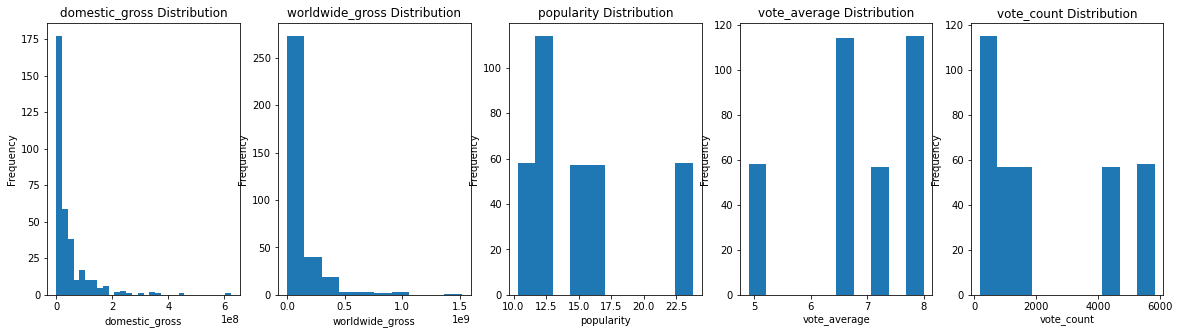

In [16]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5) ,)

# Histogram for domestic gross
axes[0].hist(df['domestic_gross'], bins=30, )
axes[0].set_title('domestic_gross Distribution')
axes[0].set_xlabel('domestic_gross')
axes[0].set_ylabel('Frequency')

# Histogram for worldwide_gross
axes[1].hist(df['worldwide_gross'])
axes[1].set_title('worldwide_gross Distribution')
axes[1].set_xlabel('worldwide_gross')
axes[1].set_ylabel('Frequency')

# Histogram for popularity
axes[2].hist(df['popularity'])
axes[2].set_title('popularity Distribution')
axes[2].set_xlabel('popularity')
axes[2].set_ylabel('Frequency')

# Histogram for vote average
axes[3].hist(df['vote_average'])
axes[3].set_title('vote_average Distribution')
axes[3].set_xlabel('vote_average')
axes[3].set_ylabel('Frequency')

# Histogram for vote_count
axes[4].hist(df['vote_count'])
axes[4].set_title('vote_count Distribution')
axes[4].set_xlabel('vote_count')
axes[4].set_ylabel('Frequency')
# Adjust spacing
plt.tight_layout
plt.show()


AS YOU CAN OBSERVE THE FOLLOWING:
1)THE DOMESTIC_GROSS,WORLDWIDE_GROSSVOTECOUNT AND POPULARITY IS POSIVELY SKEWED AS WE CAN SEE THE TAIL IS TOWARDS THE RIGHT,FOR THE VOTE AVERAGE ITS  LEANING TOWARDS THE LEFT

In [17]:
df_clean = df.dropna(subset=['domestic_gross', 'worldwide_gross'])
# i removed null values i suspected there was some outliers

In [18]:
columns=['domestic_gross', 'worldwide_gross','popularity','vote_average','vote_count']



In [19]:
def outliers(df,col):
    upper_limit=df[col].mean() +3 *df[col].std()
    lower_limit=df[col].mean()-3 * df[col].std()
#create a list that will store the index of the outliers
    #ls=df.index[(df[cols] <lower_limit) | (df[cols] >upper_limit)]
    ls= df[(df[col] < lower_limit) | (df[col] > upper_limit)].index.tolist()

    return ls


In [20]:
index_list=[]
columns = [col for col in columns if col in df.columns]

columns=['domestic_gross', 'worldwide_gross','popularity','vote_average','vote_count']

for col in columns:
    index_list.extend(outliers(df,col))
    index_list=list(set(index_list))

In [21]:
df_cleaned=df

In [22]:
df

,id,movie,domestic_gross,worldwide_gross,popularity,vote_average,vote_count,release_date
0,27,The Avengers,623279547,1517935897,10.332,4.9,170,2012-05-04
1,27,Shrek Forever After,238736787,756244673,10.332,4.9,170,2010-05-21
2,27,The Revenant,183637894,532938302,10.332,4.9,170,2015-12-25
3,27,The Aviator,102608827,208370892,10.332,4.9,170,2004-12-17
4,27,The Lord of the Rings: The Two Towers,342548984,934699645,10.332,4.9,170,2002-12-18
...,...,...,...,...,...,...,...,...
339,97,Childless,1036,1036,12.063,6.6,1100,2015-05-15
340,97,King Kong,10000000,10000650,12.063,6.6,1100,1933-04-07
341,97,Conversations with Other Women,379418,1297745,12.063,6.6,1100,2006-08-11
342,97,Jesus People,0,0,12.063,6.6,1100,2014-04-11


<H1><B>Season Grouping</B></H1>
THE SEASONS WERE GROUPED INTO TWO:
<OL>
    <LI>WINTER CHRISTMAS HOLIDAY(NOV-DEC) & SUMMER HOLIDAY(MAY-AUG)</LI>
    <LI>NON HOLIDAY/IRREGULAR SEASONS (SPRING,FALL AND EARLIER IN THE YEAR)March - April, September - October, January -    February</LI>
</OL>
Then we will use the domestic gross,worldwide gross and popularity to see if for sure releasing movies during the holiday and non holiday seasons does increase these three variables

<H2>Function to divide the release date into the targeted seasons<H/2>

In [23]:
df['release_month']=df['release_date'].dt.month_name()


In [24]:
def category_season(release_date):
    month = release_date.month
    if month in [11, 12]:
        return 'Christmas Holiday Season'
    elif month in [5, 6, 7, 8]:
        return 'Summer Season'
    else:
        return 'Non-Holiday/Irregular Period'



In [25]:
df['season_group'] = df['release_date'].apply(category_season)




In [26]:
df

,id,movie,domestic_gross,worldwide_gross,popularity,vote_average,vote_count,release_date,release_month,season_group
0,27,The Avengers,623279547,1517935897,10.332,4.9,170,2012-05-04,May,Summer Season
1,27,Shrek Forever After,238736787,756244673,10.332,4.9,170,2010-05-21,May,Summer Season
2,27,The Revenant,183637894,532938302,10.332,4.9,170,2015-12-25,December,Christmas Holiday Season
3,27,The Aviator,102608827,208370892,10.332,4.9,170,2004-12-17,December,Christmas Holiday Season
4,27,The Lord of the Rings: The Two Towers,342548984,934699645,10.332,4.9,170,2002-12-18,December,Christmas Holiday Season
...,...,...,...,...,...,...,...,...,...,...
339,97,Childless,1036,1036,12.063,6.6,1100,2015-05-15,May,Summer Season
340,97,King Kong,10000000,10000650,12.063,6.6,1100,1933-04-07,April,Non-Holiday/Irregular Period
341,97,Conversations with Other Women,379418,1297745,12.063,6.6,1100,2006-08-11,August,Summer Season
342,97,Jesus People,0,0,12.063,6.6,1100,2014-04-11,April,Non-Holiday/Irregular Period


In [27]:
#formulating the hypothesis 

<h5>Null Hypothesis (H0):No difference in terms of popularity the worldwide and domestic gross when movies are released in holiday seasons and non holiday seasons</h5>
<h5>Alternative Hypothesis(H1):Difference in terms of popularity the worldwide and domestic gross when movies are released in holidays seasons as compared to to non holiday seasons</h5>


<H3>CONDUCTING THE TEST TO REJECT/NOT REJECT THE NULL HYPOTHESIS</H3>

WE WILL CONDUCT OUR TEST USING THE MANN WHITNEY U TEST BECAUSE WE HAVE TWO INDEPENDENT GROUPS AND THEY ARE NOT NORMALLY DISTRIBUTED

#so i will perform the tests on the three variables popularity,worldwide gross and domestic gross
<h3><b>Worldwide Gross<b></h3>

WE WILL SPLIT THE DATA INTO TWO GROUPS THE HOLIDAY AND NON HOLIDAY SEASONS

In [31]:
holiday_movies = df[df['season_group'].str.contains('Christmas Holiday Season|Summer Season')]


In [32]:
#for non holiday group
non_holiday_movies = df[df['season_group'].str.contains('Non-Holiday/Irregular Period')]
non_holiday_movies

,id,movie,domestic_gross,worldwide_gross,popularity,vote_average,vote_count,release_date,release_month,season_group
8,27,Hop,108085305,188657593,10.332,4.9,170,2011-04-01,April,Non-Holiday/Irregular Period
11,27,Hansel & Gretel: Witch Hunters,55703475,214949716,10.332,4.9,170,2013-01-25,January,Non-Holiday/Irregular Period
13,27,Argo,136025503,227140757,10.332,4.9,170,2012-10-12,October,Non-Holiday/Irregular Period
18,27,The Grand Budapest Hotel,59076019,163981261,10.332,4.9,170,2014-03-07,March,Non-Holiday/Irregular Period
19,27,Take the Lead,34742066,65390493,10.332,4.9,170,2006-04-07,April,Non-Holiday/Irregular Period
...,...,...,...,...,...,...,...,...,...,...
335,97,Silent House,12739737,16610760,12.063,6.6,1100,2012-03-09,March,Non-Holiday/Irregular Period
338,97,Down by Law,1436000,1436000,12.063,6.6,1100,1986-09-26,September,Non-Holiday/Irregular Period
340,97,King Kong,10000000,10000650,12.063,6.6,1100,1933-04-07,April,Non-Holiday/Irregular Period
342,97,Jesus People,0,0,12.063,6.6,1100,2014-04-11,April,Non-Holiday/Irregular Period


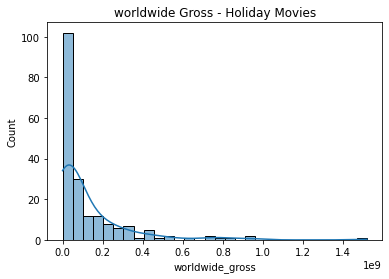

In [33]:
# i visualized to see if its a normal distributed graph
sns.histplot(holiday_movies['worldwide_gross'], kde=True)
plt.title("worldwide Gross - Holiday Movies")
plt.show()

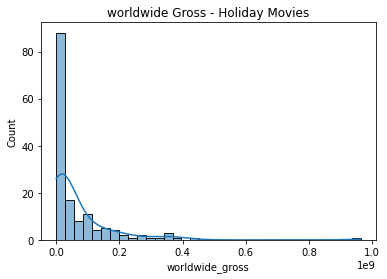

In [34]:
#then  ivisualized for the non holiday
sns.histplot(non_holiday_movies['worldwide_gross'], kde=True)
plt.title("worldwide Gross - Holiday Movies")
plt.show()

In [35]:
# we will perform a mann whitney u test on the first variable
holiday_worldwide_gross = holiday_movies['worldwide_gross']
non_holiday_worldwide_gross = non_holiday_movies['worldwide_gross']

In [36]:
stat_worldwide_gross, p_value_worldwide_gross = stats.mannwhitneyu(holiday_worldwide_gross, non_holiday_worldwide_gross)


In [37]:
print(f"Mann-Whitney U Test for Worldwide Gross:")
print(f"U-statistic: {stat_worldwide_gross}, p-value: {p_value_worldwide_gross}\n")

if p_value_worldwide_gross < 0.05:
    print("Result: Significant difference in Worldwide Gross between holiday and non-holiday movies.\n")
else:
    print("Result: No significant difference in Worldwide Gross between holiday and non-holiday movies.\n")

Mann-Whitney U Test for Worldwide Gross:
U-statistic: 12208.0, p-value: 0.005225287931699913

Result: Significant difference in Worldwide Gross between holiday and non-holiday movies.



<B>CONCLUSION FOR THE FIRST VARIABLE</B>

AS YOU CAN SEE THE P VALUE IS LOWER THAN THE SIGNIFICANCE LEVEL AND SO THAT MEANS WHETHER RELEASING DURING THE HOLIDAY SEASON INDEED HAS A SIGNIFICANT DIFFERENCE AS COMPARED TO NON HOLIDAY SEASON SO THE INCOME IS MORE WORLD WIDE DURING THE HOLIDAY SEASON

<h3>DOMESTIC_GROSS</h3>

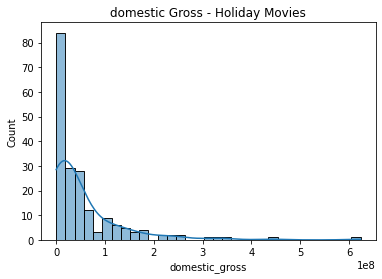

In [38]:

sns.histplot(holiday_movies['domestic_gross'], kde=True)
plt.title("domestic Gross - Holiday Movies")
plt.show()

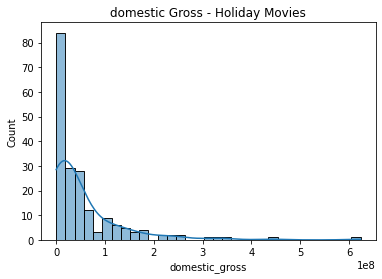

In [39]:

sns.histplot(holiday_movies['domestic_gross'], kde=True)
plt.title("domestic Gross - Holiday Movies")
plt.show()

In [40]:
# we will perform a mann whitney u test on the second variable
holiday_domestic_gross = holiday_movies['domestic_gross']
non_holiday_domestic_gross = non_holiday_movies['domestic_gross']

In [41]:
stat_domestic_gross, p_value_domestic_gross = stats.mannwhitneyu(holiday_domestic_gross, non_holiday_domestic_gross)


In [42]:
print(f"Mann-Whitney U Test for Domestic Gross:")
print(f"U-statistic: {stat_domestic_gross}, p-value: {p_value_domestic_gross}\n")

if p_value_domestic_gross < 0.05:
    print("Result: Significant difference in domestic Gross between holiday and non-holiday movies.\n")
else:
    print("Result: No significant difference in domestic Gross between holiday and non-holiday movies.\n")

Mann-Whitney U Test for Domestic Gross:
U-statistic: 12396.0, p-value: 0.009248093544003008

Result: Significant difference in domestic Gross between holiday and non-holiday movies.



<B>CONCLUSION FOR THE SECOND VARIABLE</B>

AS YOU CAN SEE THE P VALUE IS LOWER THAN THE SIGNIFICANCE LEVEL AND SO THAT MEANS WHETHER RELEASING DURING THE HOLIDAY SEASON INDEED HAS A SIGNIFICANT DIFFERENCE AS COMPARED TO NON HOLIDAY SEASON SO THE INCOME IS MORE WORLD WIDE DURING THE HOLIDAY SEASON

<h3>POPULARITY</h3>

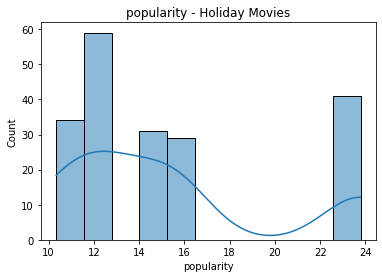

In [43]:
#WE THEN CHECK THE DISTRIBUTION FOR POPULARITY 
sns.histplot(holiday_movies['popularity'], kde=True)
plt.title("popularity - Holiday Movies")
plt.show()

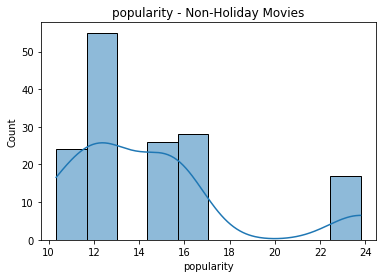

In [44]:
sns.histplot(non_holiday_movies['popularity'], kde=True)
plt.title("popularity - Non-Holiday Movies")
plt.show()

In [45]:
# we will perform a mann whitney u test on the third variable
holiday_popularity = holiday_movies['popularity']
non_holiday_popularity = non_holiday_movies['popularity']

In [46]:
stat_popularity, p_value_popularity = stats.mannwhitneyu(holiday_popularity, non_holiday_popularity)


In [47]:
print(f"Mann-Whitney U Test for popularity:")
print(f"U-statistic: {stat_popularity}, p-value: {p_value_popularity}\n")

if p_value_popularity < 0.05:
    print("Result: Significant difference in popularity between holiday and non-holiday movies.\n")
else:
    print("Result: No significant difference in popularity between holiday and non-holiday movies.\n")

Mann-Whitney U Test for popularity:
U-statistic: 13577.5, p-value: 0.1405729636971993

Result: No significant difference in popularity between holiday and non-holiday movies.



<B> IN CONCLUSION </B>

RELEASING A MOVIE BETWEEN THE HOLIDAY AND NON HOLIDAY SEASON ACTUALLY DOESNT AFFECT THE POPULARITY BUF FOR DOMESTIC INCOME AND WORLDWIDE INCOME IT DOES AFFECT SO WHEN RELEASING MOVIES ITS BETTER TO RELEASE MOVIES DURING THE HOLIDAY SEASONS